<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ModelOCT 

In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import glob
import PIL
import plotly
import plotly.graph_objs as go
import pandas as pd
from numpy import array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, MaxPool2D)
import time
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential
import requests
from IPython.display import Image
from io import BytesIO  
import pickle as p 
import plotly.graph_objs as go  
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.image_data_format()
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

## เตรียมชุดของข้อมูล

In [2]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่า Mounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/focus2022'  # data เราอยู่โฟล์เดอร์ไหน

In [4]:
batch_size = 16  # กำหนดขนาดของแต่ละการอ่านข้อมูล
img_height = 256  # ความสูงของรูปภาพแต่ละรูป
img_width = 256   # ความกว้างของรูปภาพแต่ละรูป

num_classes = 4

## Train

In [5]:
# Train
train_dir = "/content/drive/My Drive/focus2022/train"
train_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 502 images belonging to 4 classes.


In [6]:
print('Train')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนภาพของคลาส

Train
[0 1 2 3]
[131 117 123 131]


In [7]:
train_set[0][0][0].shape   # W*H*3 (3 Channel RGB) 

(256, 256, 3)

## Validation

In [8]:
# Validation
val_dir ="/content/drive/My Drive/focus2022/validation"
val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 63 images belonging to 4 classes.


In [9]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)        # คลาส
print(counts)     # จำนวนข้อมูลของคลาส

Validation
[0 1 2 3]
[16 15 15 17]


## Test

In [10]:
# Test
test_dir ="/content/drive/My Drive/focus2022/test"
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = tf.keras.utils.image_dataset_from_directory(test_dir,image_size=(img_height, img_width))

Found 63 files belonging to 4 classes.


In [11]:
class_names = test_set.class_names
print(class_names)

['CSC', 'Normal', 'PCV', 'VKH']


## Noise Reduction

In [15]:
import cv2
import os
from google.colab.patches import cv2_imshow

In [30]:
# กำหนดพารามิเตอร์ Median Filter
ksize = 5

data_dir = pathlib.Path('/content/drive/My Drive/focus2022/test/VKH')

dir_forsave = os.chdir('/content/drive/My Drive/focus2022/test1/Noise VKH')

Original image: EV9935 06-06-16 RE_000_cropped.png


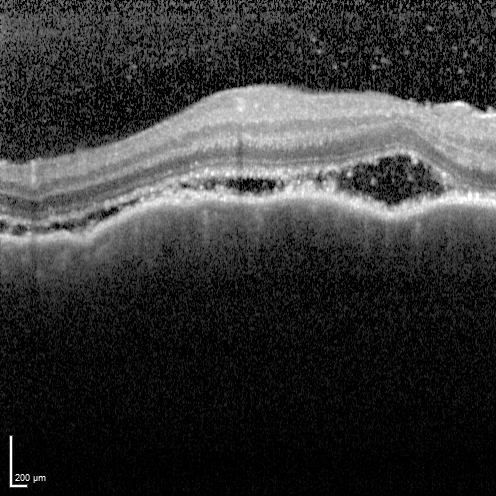

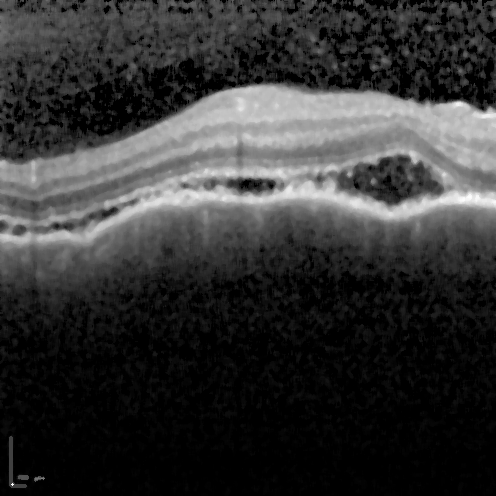

Original image: HJ2345 26-08-20 RE_001006_cropped.png


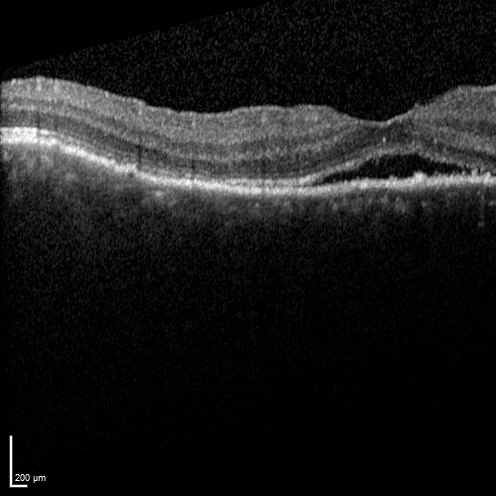

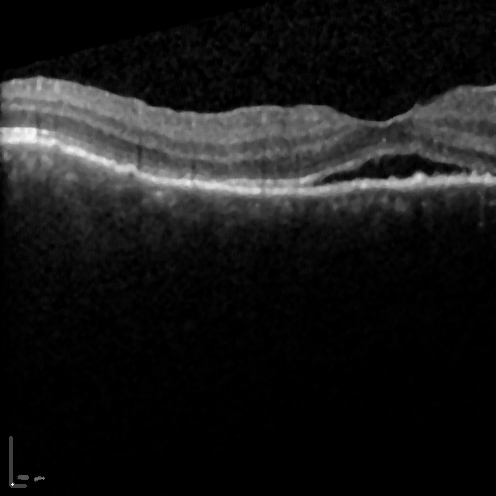

Original image: DQ7866 20-01-20 LE_001_cropped.png


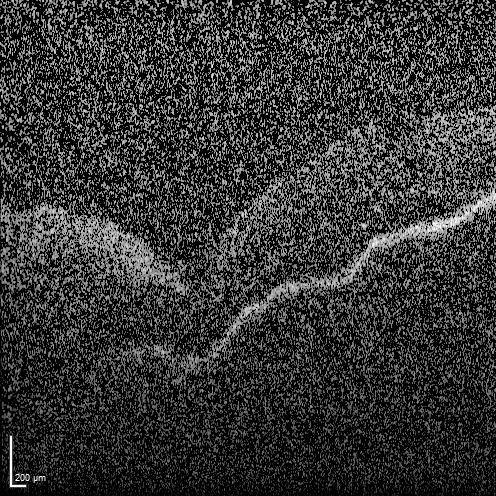

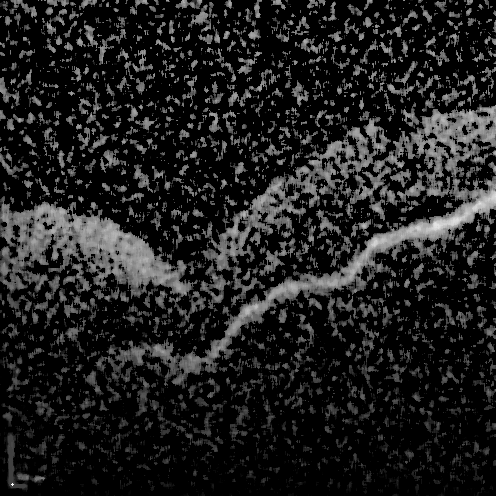

Original image: HT4965 27-12-10 LE_001_cropped.png


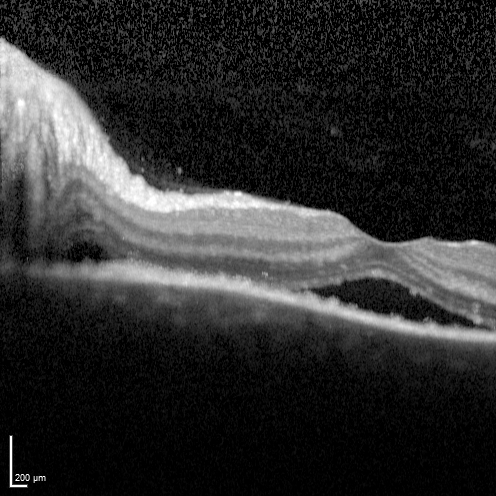

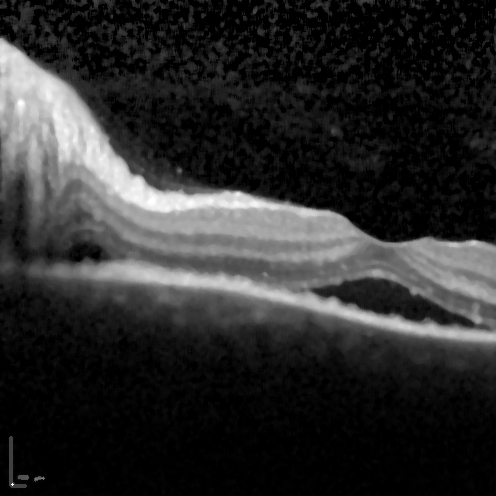

Original image: HY2225 22-08-11 RE_001_cropped.png


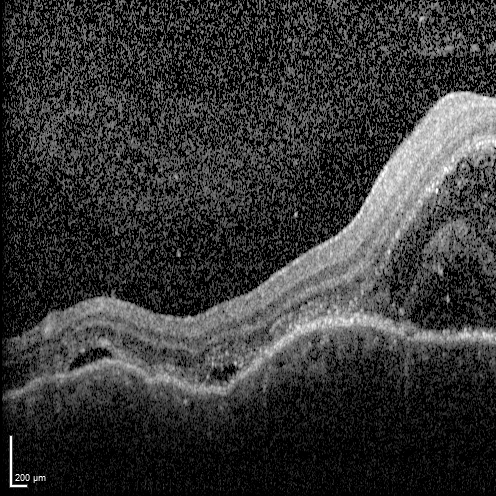

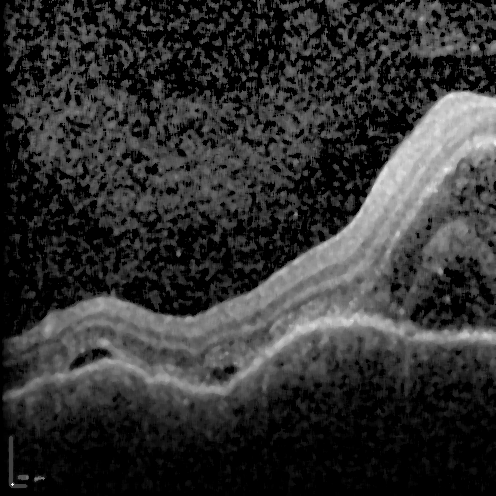

Original image: IH3187 11-12-12 LE_000_cropped.png


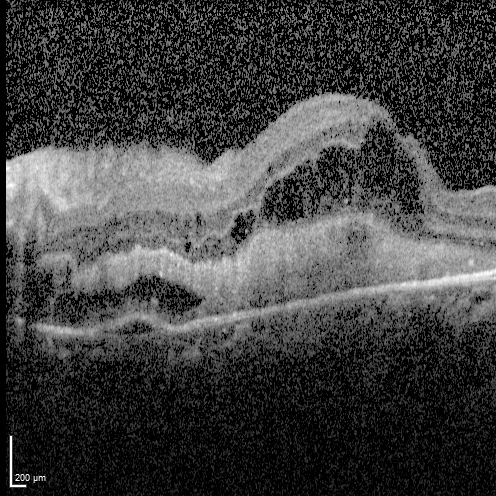

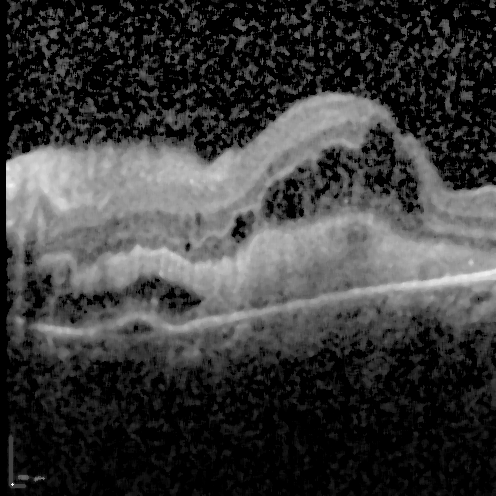

Original image: IY9905 18-05-15 RE_000_cropped.png


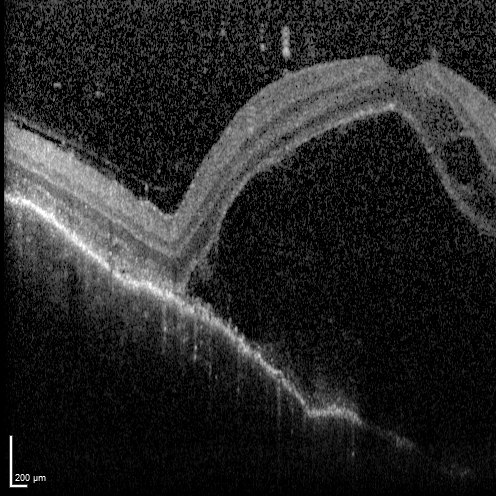

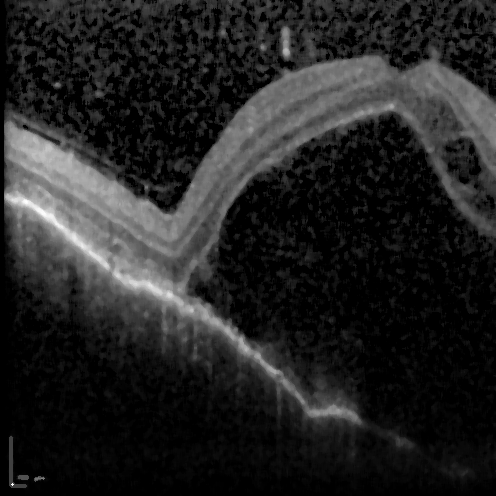

Original image: IG6113 21-09-15 LE_002_cropped.png


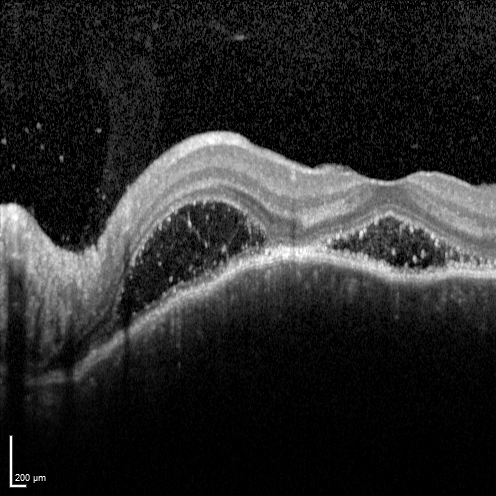

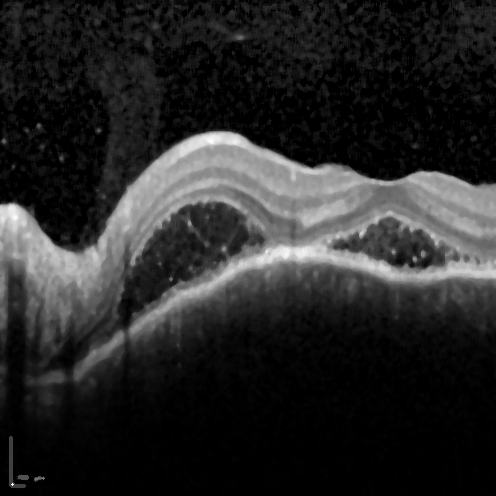

Original image: ID2431 11-05-12 LE_000_cropped.png


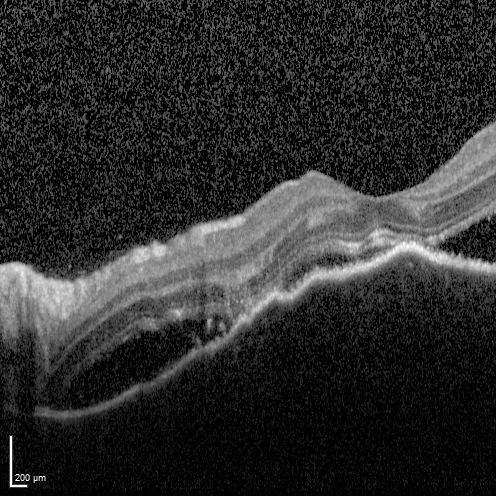

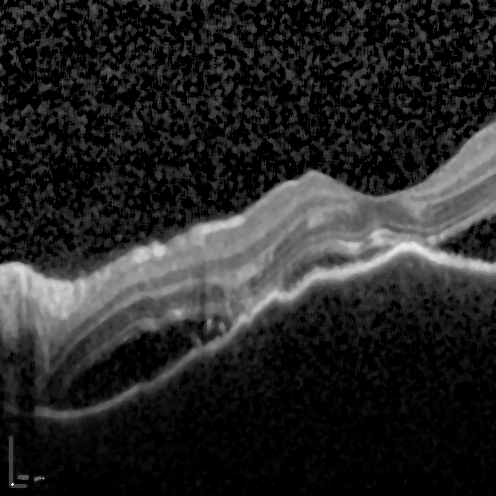

Original image: IH5042 07-12-12 LE_000_cropped.png


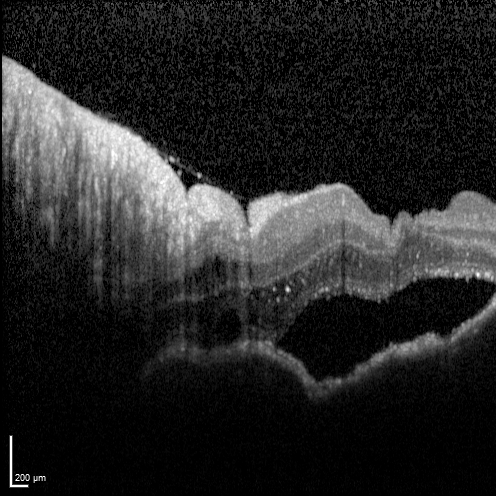

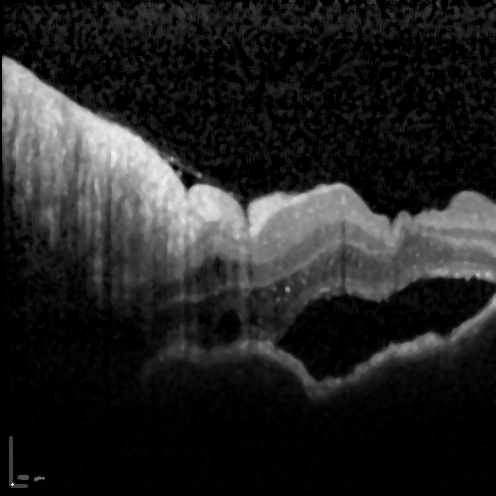

Original image: IW5937 19-01-15 RE_000_cropped.png
Original image: IX7015 13-03-15 LE_002_cropped.png


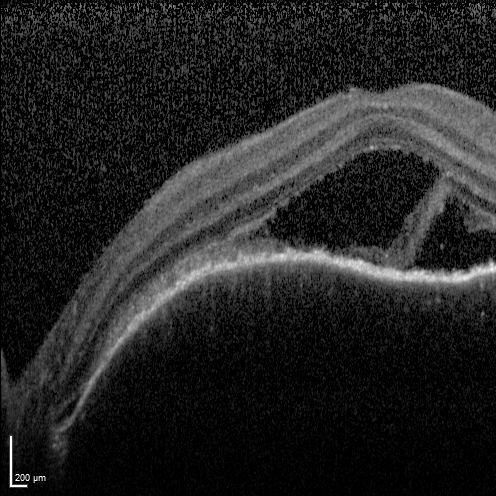

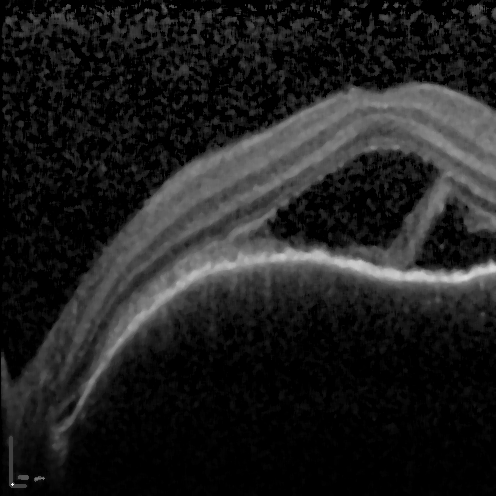

Original image: J_S_000_cropped.png


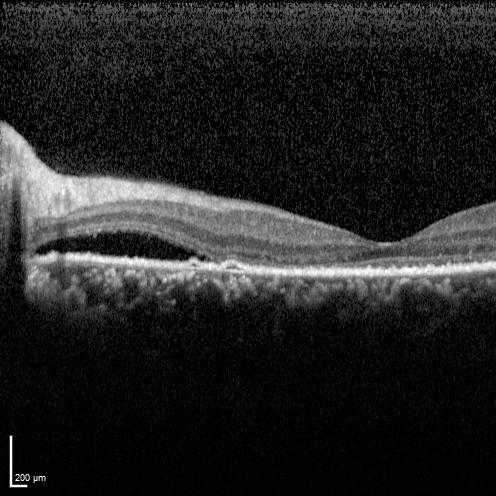

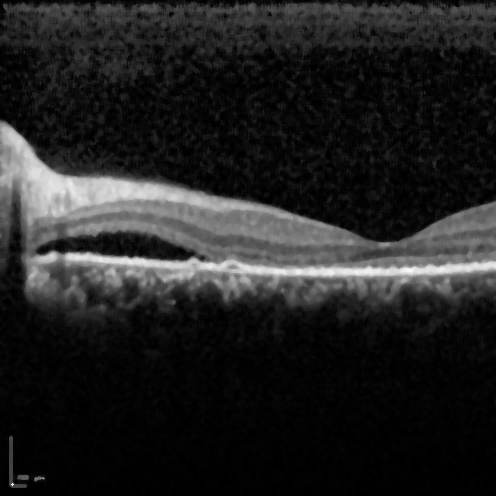

Original image: GZ7938 LE 01-12-20_000_cropped.png


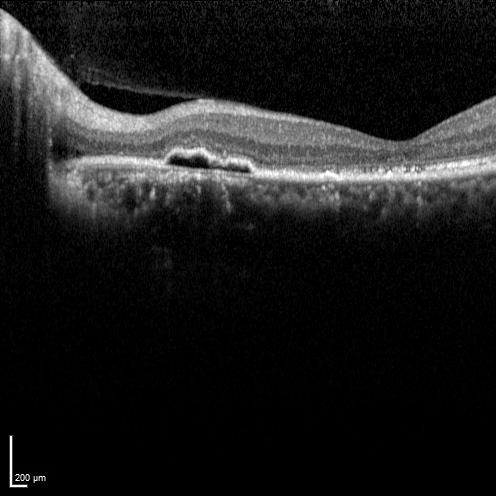

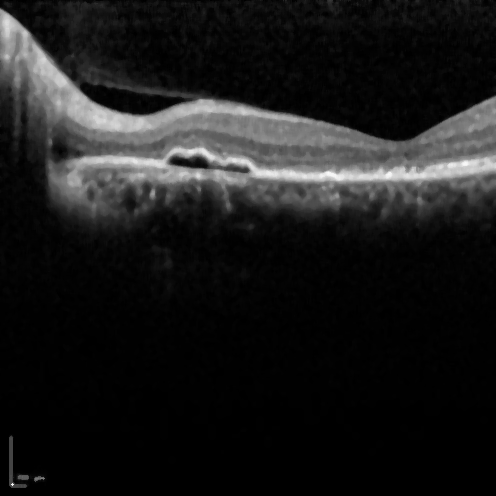

Original image: JA1963 17-07-15 RE_002_cropped.png


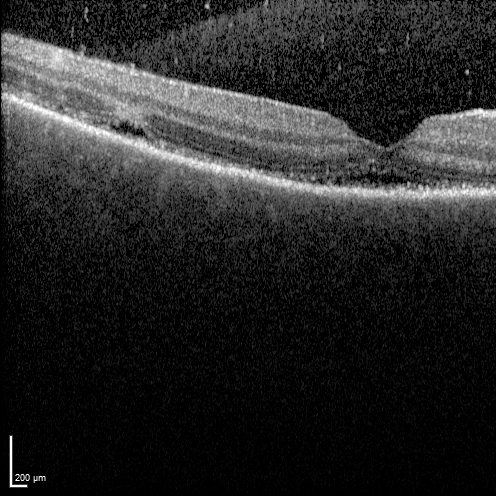

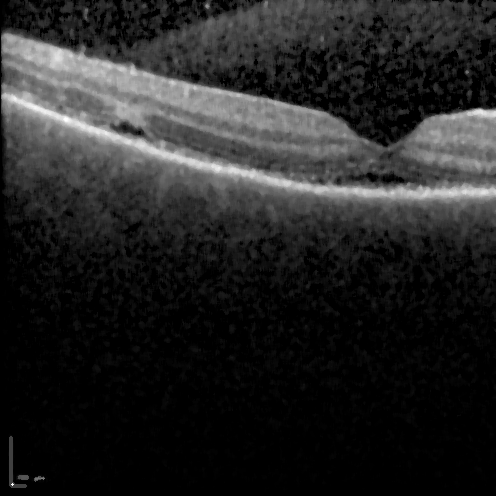

In [31]:
filepath = '/content/drive/My Drive/focus2022/test/VKH'

# วนลูปในแต่ละภาพ
for file in os.listdir(filepath):
    # อ่านภาพ OCT ของจอประสาทตา
    filename = os.path.join(filepath, file)
    img = cv2.imread(filename, 0)
    
    # การใช้งาน Median Filter เพื่อลบเสียงออกจากภาพ
    filtered_img = cv2.medianBlur(img, ksize)

    # แสดงผลภาพก่อนและหลังการลบเสียง พร้อมชื่อ
    print("Original image:", file)
    cv2_imshow(img)
    ("Filtered image:", 'filtered_' + file)
    cv2_imshow(filtered_img)  
    
    # บันทึกภาพหลังการลบเสียงลงบนไดรฟ์
    output_filename = os.path.join('/content/drive/My Drive/focus2022/test1/Noise VKH', 'filtered_' + file)
    cv2.imwrite(output_filename, filtered_img)